In [1]:
import os
import random
import matplotlib.pyplot as plt

In [2]:
def load_data(filename: str):
    file = open(filename, 'r')
    text = file.read()
    lines = text.split('\n')
    times = []
    for line in lines:
        if line:
            timestr = line.split('\t')[1]
            sec = timestr[2:-1]
            times.append(float(sec))
    file.close()
    return times

In [3]:
def get_random_rgb_color():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)

In [4]:
def plot_times(num_qubits, ax, data, label):
    color = get_random_rgb_color()
    ax.semilogy(num_qubits[:len(data)], data, label=label, color=color)
    ax.scatter(num_qubits[:len(data)], data, color=color)

In [5]:
def plot_test(num_qubits, test_dir, test_name):
    fig, ax = plt.subplots()

    try: plot_times(num_qubits, ax, load_data(os.path.join(test_dir, 'haskell.txt')), 'Haskell')
    except: pass
        
    try: plot_times(num_qubits, ax, load_data(os.path.join(test_dir, 'qiskit_normal.txt')), 'Qiskit (normal)')
    except: pass
        
    try: plot_times(num_qubits, ax, load_data(os.path.join(test_dir, 'cirq_normal.txt')), 'Cirq (normal)')
    except: pass
        
    try: plot_times(num_qubits, ax, load_data(os.path.join(test_dir, 'cirq_queued.txt')), 'Cirq (queued)')
    except: pass
    
    try: plot_times(num_qubits, ax, load_data(os.path.join(test_dir, 'qiskit_queued.txt')), 'Qiskit (queued)')
    except: pass    
    
    ax.set_title(test_name)
    ax.legend()
    ax.set_xlabel('Qubits')
    ax.set_ylabel('Simulation time (seconds)')
    
    plt.show()

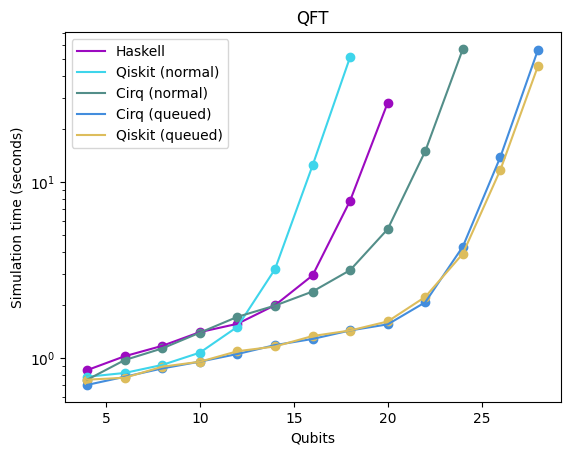

In [8]:
plot_test(list(range(4, 30, 2)), 'results/qft', 'QFT')

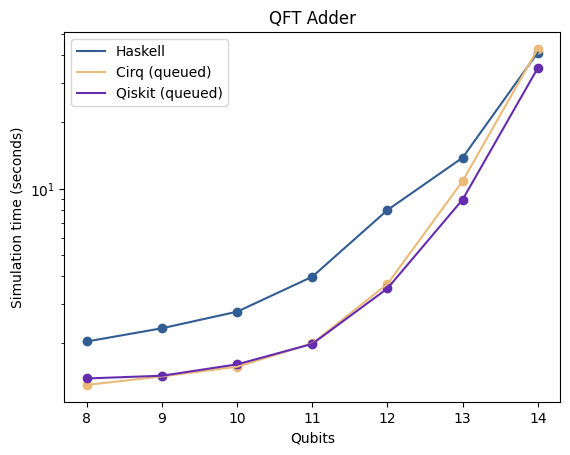

In [9]:
plot_test(list(range(8, 15)), 'results/qftadder', 'QFT Adder')

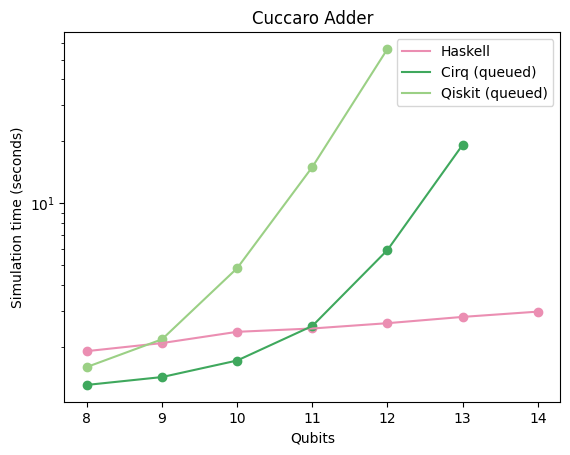

In [13]:
plot_test(list(range(8, 15)), 'results/cuccaroadder', 'Cuccaro Adder')

In [ ]:
plot_test(list(range(4, 20)), 'results/maxcut', 'MaxCut')